<a href="https://colab.research.google.com/github/akshatah33/Datamining-Project/blob/main/Integrated_DM_Project_Group_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group 7, DM project

##Import Required Libraries

In [135]:
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import collections
import queue
import scipy.io as spio
from sklearn import datasets
import math
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import itertools
# Pretty display for notebooks
%matplotlib inline

## Clustering Algorothm Implementations

### KMeans Algorithm Implemenation

In [136]:
class KMeans:
    def __init__(self, k):
      # Initializing data variables
        self.data = pd.DataFrame()
        self.k = k
        self.centroids = pd.DataFrame()
        self.cluster_set = np.ndarray(1, dtype=int)
        self.old_centroids = pd.DataFrame()

    def evaluate(self, df):
        self.data = df.copy(deep=True)
        self.cluster_set = np.zeros(len(self.data), dtype=int)

        # Initializing centroids randomly
        self.centroids = pd.DataFrame(self.data.sample(self.k))
        self.centroids.reset_index(drop=True, inplace=True)

        print("\nInitial centroids:")
        print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.k, self.data.shape[1])), columns=self.data.columns)

        # Compare every data point to each of the centroids and assign point cluster with minimum distance until centroids stop changing
        count = 0;
        while not self.old_centroids.equals(self.centroids):
            self.old_centroids = self.centroids.copy(deep=True)

            for current_row in range(0, len(self.data)):
                distances = {}
                point = self.data.iloc[current_row]
                # Calculate the Euclidean distance between the current point and each of the centroids
                for centroid_index in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[centroid_index]
                    # distances.update({centroid_index : np.linalg.norm(point - centroid)})
                    distances.update({centroid_index : np.sqrt(np.sum((point - centroid)**2))})
                # Assign this point to a cluster by storing the cluster id with minimum distance in the corresponding row index
                self.cluster_set[current_row] = min(distances, key=distances.get)

            # Calculate new centroid for each cluster
            for centroid_number in range(0, self.k):
                cluster_indexes = np.where(self.cluster_set == centroid_number)[0]
                # Set the new centroid to the mean value of the data points within this cluster
                self.centroids.iloc[centroid_number] = self.data.iloc[cluster_indexes].mean()

            count += 1
            print("\nIteration: ", count)
            print("\nOld centroids:")
            print(self.old_centroids)
            print("New centroids:")
            print(self.centroids)

### DBScan Algorithm Implemenation

In [137]:
class DBSCAN():
  """
  while initializing, 2 parameters are required
  eps     -> the radius per circle
  min_pts -> minimun points per cluster 
  """
  def __init__(self, eps, min_pts):
    self.eps = eps
    self.min_pts = min_pts
    self.noise = None

  def find_neighbours(self, current_point):
    near_points = []
    for each_point in range(0, self.total_points):
      if (math.sqrt(np.power(self.dataset[current_point, :]-self.dataset[each_point, :],2).sum())) < self.eps:
        near_points.append(each_point)
    return near_points

  def has_cluster(self, output, each_point, cluster):
    near_points = self.find_neighbours(each_point)
    if len(near_points) < self.min_pts:
      output[each_point] = "Noise"
      return False
    else:
      output[each_point] = cluster
      for current_neighbour in near_points:
        output[current_neighbour] = cluster
      while(len(near_points) > 0):
        current_point = near_points[0]
        current_near_points = self.find_neighbours(current_point)
        if(len(current_near_points) >= self.min_pts):
          for i in range(0, len(current_near_points)):
            point = current_near_points[i]
            if output[point] is None:
              near_points.append(point)
            output[point] = cluster
        near_points = near_points[1:]
    return True

  def refineData(self, finalData):
    dictData = {"category":[]}
    for i, val in enumerate(self.columns):
      dictData[val] = []
    for i, val in enumerate(self.dataset):
      for i1, val1 in enumerate(self.columns):
        dictData[val1].append(val[i1])
      dictData["category"].append("Noise" if finalData[i] == "Noise" else "Cluster " + str(finalData[i]))
    
    df = pd.DataFrame(dictData)
    return df

  def evaluate(self, dataset):
    cluster = 1
    self.columns = list(dataset)
    dataset = dataset.values
    self.total_points = dataset.shape[0]
    self.dataset = dataset
    output = [None] * self.total_points
    for each_point in range(0, self.total_points):
      current_point = self.dataset[each_point, :]
      if(output[each_point] is None):
        to_append = self.has_cluster(output, each_point, cluster)
        if to_append:
          cluster = cluster + 1
    return self.refineData(output)

## `Synthetic` Dataset Globular

In [138]:
centers = [[1, 2], [-2, -1], [1, -2], [3, -2]]
X, y = make_blobs(n_samples=700, centers=centers,random_state=2,cluster_std=0.6)

data = {}
data["x"] = X[:,0]
data["y"] = X[:,1]
data["class"] = y
synthetic_dataset = pd.DataFrame(data)
print(synthetic_dataset.head())

          x         y  class
0  2.606221 -1.877769      3
1  0.110521  2.507787      0
2  1.144864  2.298455      0
3  3.374732 -1.478347      3
4  3.226656 -2.202063      3


In [139]:
synthetic_dataset.describe()

,x,y,class
count,700.000000,700.000000,700.000000
mean,0.751167,-0.789621,1.500000
std,1.887000,1.765682,1.118833
min,-3.511748,-3.456952,0.000000
25%,-0.523694,-2.103114,0.750000
50%,0.997058,-1.400046,1.500000
75%,2.097116,0.595929,2.250000
max,4.986408,3.896580,3.000000


In [140]:
synthetic_dataset.groupby('class').size()

class
0    175
1    175
2    175
3    175
dtype: int64

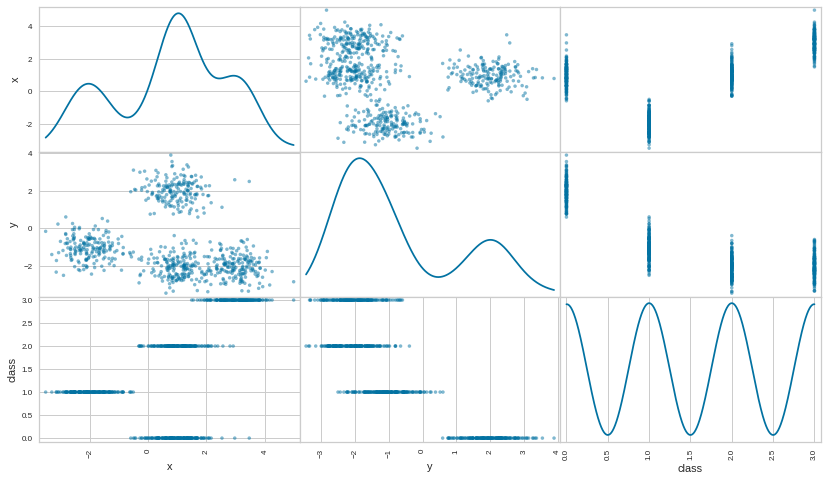

In [141]:
pd.plotting.scatter_matrix(synthetic_dataset, figsize = (14,8),  diagonal = 'kde');

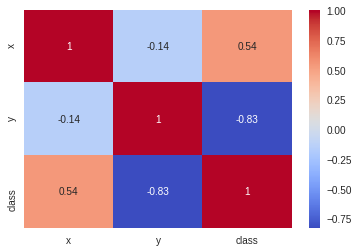

In [142]:
sns.heatmap(synthetic_dataset.corr(), annot=True, cmap='coolwarm')

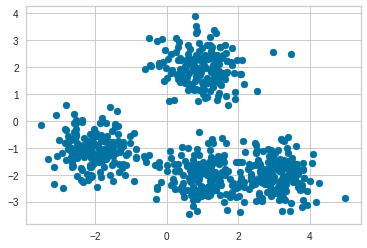

In [143]:
plt.scatter(synthetic_dataset['x'], synthetic_dataset['y'])

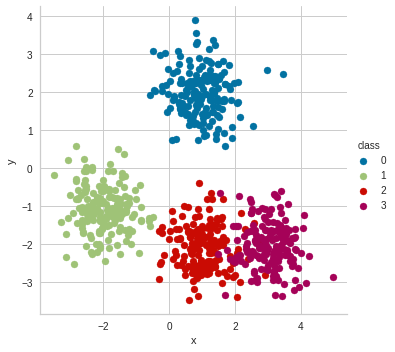

In [144]:
sns.FacetGrid(synthetic_dataset, hue="class", height=5).map(plt.scatter, "x", "y").add_legend()

In [145]:
# Removing class label
dataset = synthetic_dataset.loc[:, ["x", "y"]]

If we use the eps value 0.5 we could see some datapoints which are considered as noise as they lie far away from there cluster. If we increase the eps there might be a case that the points from two clusters mix as they are very dense

In [146]:
eps = 0.5
min_points = 30
dbscan = DBSCAN(eps, min_points)
output_synthetic = dbscan.evaluate(dataset)
print(output_synthetic)

      category         x         y
0    Cluster 1  2.606221 -1.877769
1    Cluster 2  0.110521  2.507787
2    Cluster 2  1.144864  2.298455
3    Cluster 1  3.374732 -1.478347
4    Cluster 1  3.226656 -2.202063
..         ...       ...       ...
695  Cluster 4  0.848472 -1.834549
696  Cluster 1  3.920613 -2.609416
697      Noise -0.220671 -1.543109
698  Cluster 3 -1.587306 -0.764990
699  Cluster 2  1.616911  1.566872

[700 rows x 3 columns]


In [147]:
eps1 = 0.7
min_points1 = 30
dbscan1 = DBSCAN(eps1, min_points1)
output_synthetic1 = dbscan1.evaluate(dataset)
print(output_synthetic1)

      category         x         y
0    Cluster 1  2.606221 -1.877769
1    Cluster 2  0.110521  2.507787
2    Cluster 2  1.144864  2.298455
3    Cluster 1  3.374732 -1.478347
4    Cluster 1  3.226656 -2.202063
..         ...       ...       ...
695  Cluster 1  0.848472 -1.834549
696  Cluster 1  3.920613 -2.609416
697  Cluster 1 -0.220671 -1.543109
698  Cluster 3 -1.587306 -0.764990
699  Cluster 2  1.616911  1.566872

[700 rows x 3 columns]


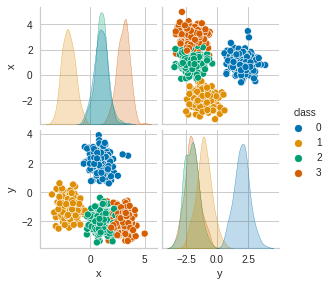

In [148]:
sns.pairplot(synthetic_dataset, hue="class", height = 2, palette = 'colorblind');

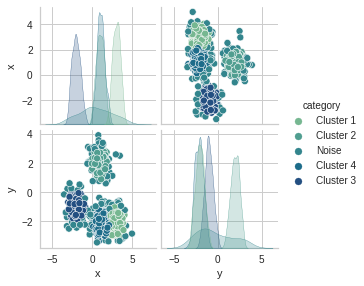

In [149]:
sns.pairplot(output_synthetic, hue="category", height = 2, palette = 'crest'); 

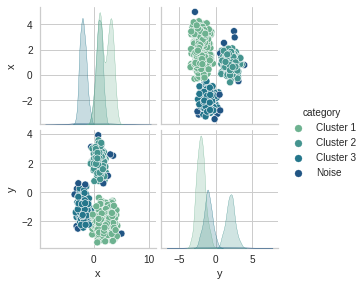

In [150]:
sns.pairplot(output_synthetic1, hue="category", height = 2, palette = 'crest');

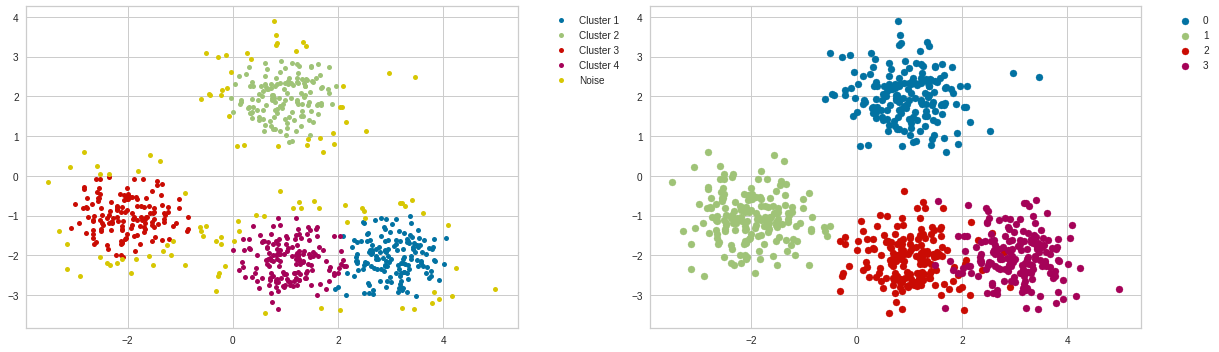

In [151]:
fig, axs = plt.subplots(ncols=2, figsize=(17,5))
groups = output_synthetic.groupby('category')
for name, group in groups:
    axs[0].plot(group.x, group.y, marker='o', linestyle='', markersize=5, label=name)
axs[0].legend()
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

for n, grp in synthetic_dataset.groupby("class"):
    axs[1].scatter(grp.x, grp.y, label=n)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Synthetic dataset non globular shape

## `Synthetic` Dataset Non Globular

In [152]:
centers = [[1, 2], [-2, -1], [1, -2], [3, -2]]
X, y = make_blobs(n_samples=200, centers=centers,random_state=10,cluster_std=1.0)
data = {}
data["x"] = X[:,0]
data["y"] = X[:,1]
data["class"] = y
synthetic_dataset = pd.DataFrame(data)

In [153]:
synthetic_dataset.describe()

,x,y,class
count,200.000000,200.000000,200.00000
mean,0.884422,-0.782272,1.50000
std,2.026874,1.921792,1.12084
min,-4.295103,-4.395572,0.00000
25%,-0.545877,-2.041837,0.75000
50%,1.097456,-1.342368,1.50000
75%,2.150884,0.255537,2.25000
max,5.679910,4.467651,3.00000


In [154]:
synthetic_dataset.groupby('class').size()

class
0    50
1    50
2    50
3    50
dtype: int64

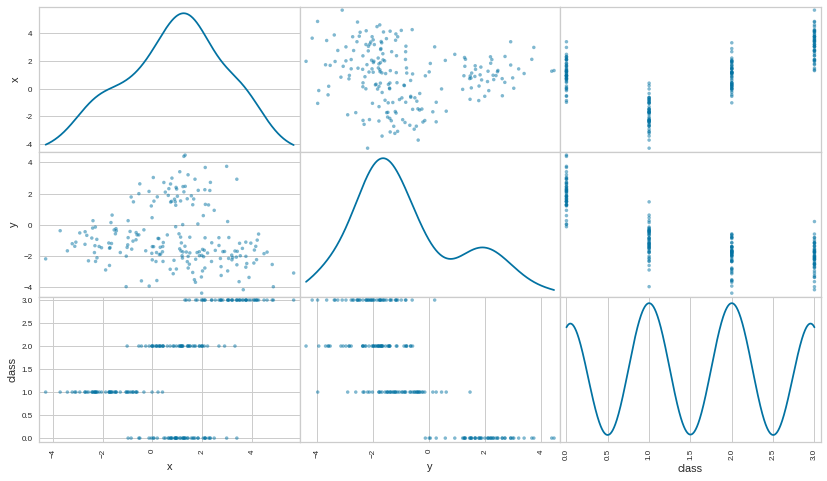

In [155]:
pd.plotting.scatter_matrix(synthetic_dataset, figsize = (14,8),  diagonal = 'kde');

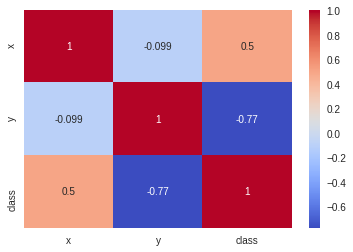

In [156]:
sns.heatmap(synthetic_dataset.corr(), annot=True, cmap='coolwarm')

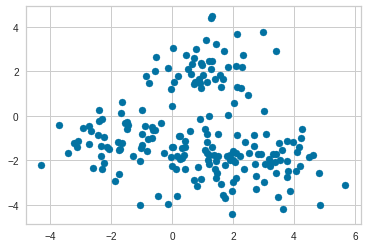

In [157]:
plt.scatter(synthetic_dataset['x'], synthetic_dataset['y'])

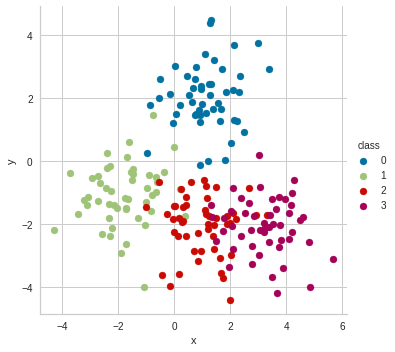

In [158]:
sns.FacetGrid(synthetic_dataset, hue="class", height=5).map(plt.scatter, "x", "y").add_legend()

### DBScan

In [159]:
# Removing class label
dataset = synthetic_dataset.loc[:, ["x", "y"]]

In [160]:
eps = 0.7
min_points = 10
dbscan = DBSCAN(eps, min_points)
output_synthetic = dbscan.evaluate(dataset)
print(output_synthetic)

      category         x         y
0        Noise  2.331587  2.715279
1    Cluster 1  3.197272 -2.255280
2        Noise  2.985085  3.744814
3    Cluster 1  2.902304 -1.720395
4    Cluster 1  4.611457 -1.760661
..         ...       ...       ...
195      Noise -0.014614  0.447166
196      Noise -0.045133  1.201991
197  Cluster 2  0.767818  1.498271
198  Cluster 1  4.214783 -0.991717
199      Noise -1.622247  0.614408

[200 rows x 3 columns]


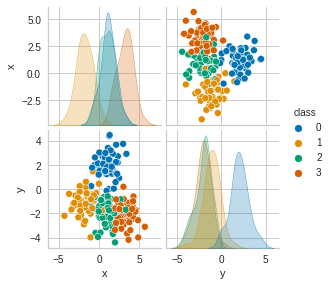

In [161]:
sns.pairplot(synthetic_dataset, hue="class", height = 2, palette = 'colorblind');

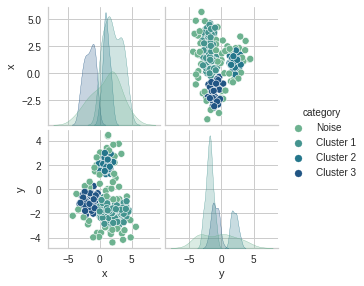

In [162]:
sns.pairplot(output_synthetic, hue="category", height = 2, palette = 'crest'); 

For synthetic datset non globular shapes , we need to keep the min points low and eps value high as all the shapes are very scattered. If we keep a low eps or high minpts , all the datapoints will be considered as noise

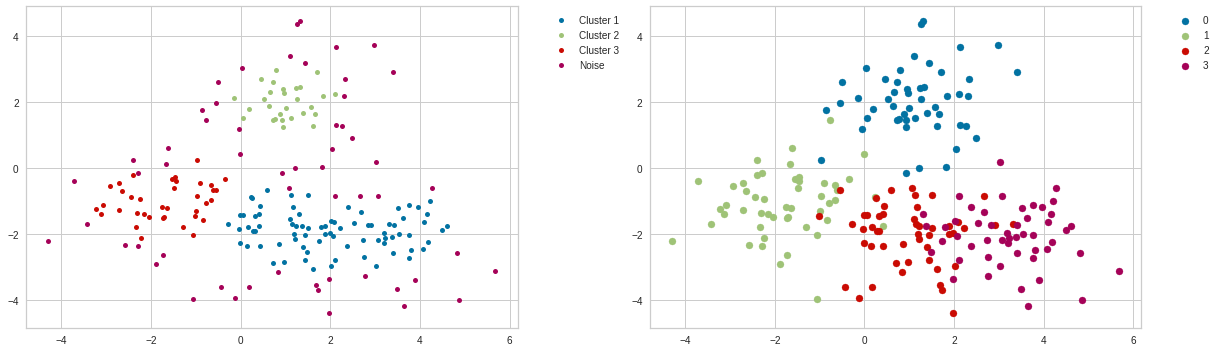

In [163]:
fig, axs = plt.subplots(ncols=2, figsize=(17,5))
groups = output_synthetic.groupby('category')
for name, group in groups:
    axs[0].plot(group.x, group.y, marker='o', linestyle='', markersize=5, label=name)
axs[0].legend()
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

for n, grp in synthetic_dataset.groupby("class"):
    axs[1].scatter(grp.x, grp.y, label=n)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## `IRIS` Dataset Analysis
---
URL = http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


###Importing dataset and visualing

In [164]:
# Importing Iris
iris_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

urlretrieve(iris_url)

iris_dataset = pd.read_csv(iris_url, sep=',', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [165]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [166]:
iris_dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

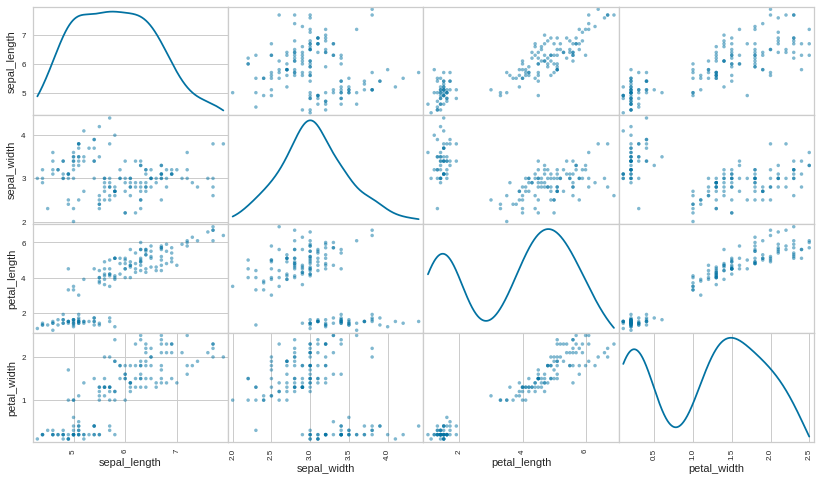

In [167]:
pd.plotting.scatter_matrix(iris_dataset, figsize = (14,8),  diagonal = 'kde');

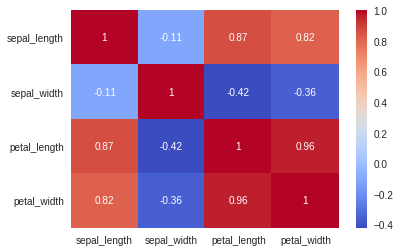

In [168]:
sns.heatmap(iris_dataset.corr(), annot=True, cmap='coolwarm')

###Dataset clustering with KMeans

In [169]:
# Removing class label
iris_custom = iris_dataset.drop(columns=['class'])
iris_custom.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


####Using the Elbow method to determine an optimal number of clusters



Initial centroids:
   sepal_length  sepal_width  petal_length  petal_width
0           5.6          2.5           3.9          1.1

Iteration:  1

Old centroids:
   sepal_length  sepal_width  petal_length  petal_width
0           5.6          2.5           3.9          1.1
New centroids:
   sepal_length  sepal_width  petal_length  petal_width
0      5.843333        3.054      3.758667     1.198667

Iteration:  2

Old centroids:
   sepal_length  sepal_width  petal_length  petal_width
0      5.843333        3.054      3.758667     1.198667
New centroids:
   sepal_length  sepal_width  petal_length  petal_width
0      5.843333        3.054      3.758667     1.198667

Initial centroids:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.8           1.5          0.3
1           6.3          2.3           4.4          1.3

Iteration:  1

Old centroids:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.8           1.5          0

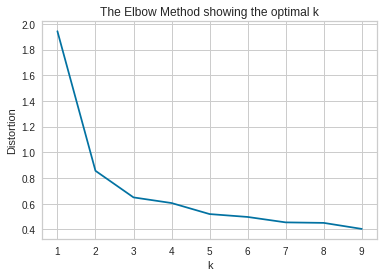

In [170]:
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(k=k)
 kmeanModel.evaluate(iris_custom)
 distortions.append(sum(np.min(cdist(iris_custom, kmeanModel.centroids, 'euclidean'), axis=1)) / iris_custom.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the graph we can determine that the most optimum value of k should be 3. The distortion between `k=2` and `k=3`is significant, while between `k=3` and `k=4` is not nearly as much.

For the first run, we are setting the number of clusters to be 3, in order to visualise how accurate our implementation of KMeans is, as the dataset has 3 classes (species) originally.

####Clustering using `k=3`

In [171]:
number_of_clusters = 3
kmeans = KMeans(k=number_of_clusters)
kmeans.evaluate(df=iris_custom)


Initial centroids:
   sepal_length  sepal_width  petal_length  petal_width
0           5.2          4.1           1.5          0.1
1           4.6          3.4           1.4          0.3
2           5.0          3.6           1.4          0.2

Iteration:  1

Old centroids:
   sepal_length  sepal_width  petal_length  petal_width
0           5.2          4.1           1.5          0.1
1           4.6          3.4           1.4          0.3
2           5.0          3.6           1.4          0.2
New centroids:
   sepal_length  sepal_width  petal_length  petal_width
0      6.640000     3.258000      4.934000     1.724000
1      4.881250     2.868750      2.250000     0.559375
2      5.710294     2.991176      3.604412     1.113235

Iteration:  2

Old centroids:
   sepal_length  sepal_width  petal_length  petal_width
0      6.640000     3.258000      4.934000     1.724000
1      4.881250     2.868750      2.250000     0.559375
2      5.710294     2.991176      3.604412     1.113235
New cen

KMeans will always converge in a finite number of steps, as the domain of the algorithm is always a finite set. Eventually, the function will end up in a cycle, where the current assignment is the same as the previous one, which means the next assignment will also be the same. 

###Dataset clustering with DBScan

In [172]:
# Removing class label
dataset = iris_custom.loc[:, ["sepal_length", "sepal_width","petal_length", "petal_width"]]

In [173]:
# sepal
eps = 0.5
min_points = 14
dbscan = DBSCAN(eps, min_points)
output = dbscan.evaluate(dataset)
print(output)

      category  sepal_length  sepal_width  petal_length  petal_width
0    Cluster 1           5.1          3.5           1.4          0.2
1    Cluster 1           4.9          3.0           1.4          0.2
2    Cluster 1           4.7          3.2           1.3          0.2
3    Cluster 1           4.6          3.1           1.5          0.2
4    Cluster 1           5.0          3.6           1.4          0.2
..         ...           ...          ...           ...          ...
145      Noise           6.7          3.0           5.2          2.3
146      Noise           6.3          2.5           5.0          1.9
147      Noise           6.5          3.0           5.2          2.0
148      Noise           6.2          3.4           5.4          2.3
149      Noise           5.9          3.0           5.1          1.8

[150 rows x 5 columns]


If we change `eps = 0.3` and keep the `min_points` same as 14 then all the data points will be under noise cluster as the circle formed will be too small for having 14 min points

In [174]:
eps1 = 0.3
min_points1 = 14
dbscan1 = DBSCAN(eps1, min_points1)
output1 = dbscan1.evaluate(dataset)
print(output1)

    category  sepal_length  sepal_width  petal_length  petal_width
0      Noise           5.1          3.5           1.4          0.2
1      Noise           4.9          3.0           1.4          0.2
2      Noise           4.7          3.2           1.3          0.2
3      Noise           4.6          3.1           1.5          0.2
4      Noise           5.0          3.6           1.4          0.2
..       ...           ...          ...           ...          ...
145    Noise           6.7          3.0           5.2          2.3
146    Noise           6.3          2.5           5.0          1.9
147    Noise           6.5          3.0           5.2          2.0
148    Noise           6.2          3.4           5.4          2.3
149    Noise           5.9          3.0           5.1          1.8

[150 rows x 5 columns]


###Comparision between predicted and actual clusters - KMeans

In [175]:
iris_result = iris_custom.copy(deep=True)
iris_result['cluster'] = kmeans.cluster_set
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
iris_result_with_centroids = pd.concat([iris_result, centroids]) # Useful if using seaborn

In [176]:
print("Original clustering in dataset")
print(iris_dataset["class"].value_counts())
print("\nClustering using custom KMeans")
print(iris_result["cluster"].value_counts())

Original clustering in dataset
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

Clustering using custom KMeans
2    61
1    50
0    39
Name: cluster, dtype: int64


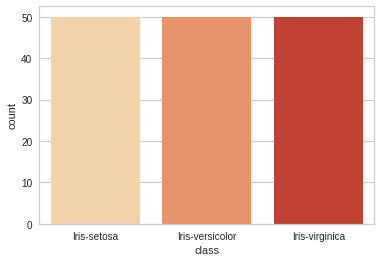

In [177]:
sns.countplot(x='class',data=iris_dataset, palette="OrRd")

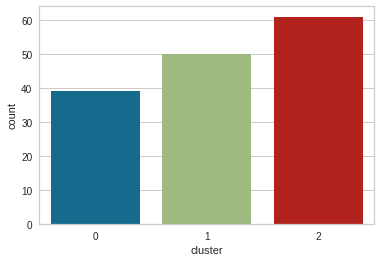

In [178]:
sns.countplot(x='cluster',data=iris_result)

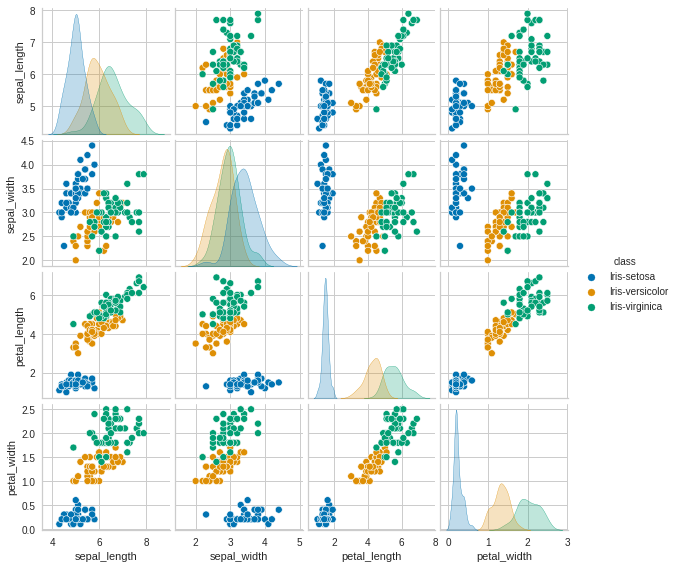

In [179]:
sns.pairplot(iris_dataset, hue="class", height = 2, palette = 'colorblind');

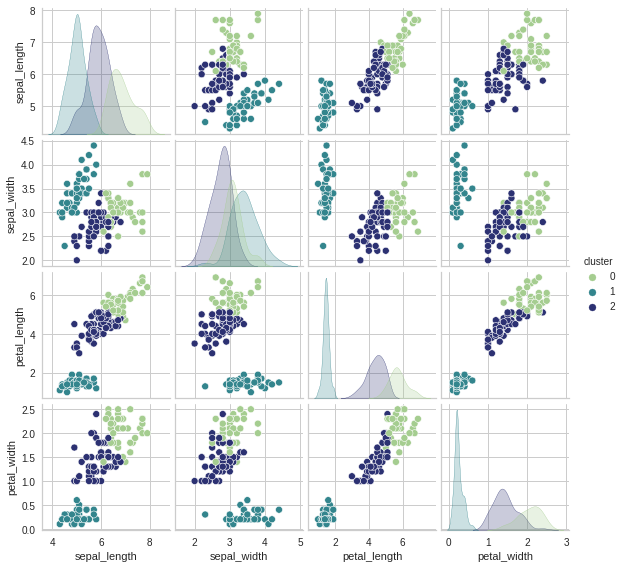

In [180]:
legend_order = list(range(number_of_clusters))
legend_order.append('centroid')
sns.pairplot(iris_result, hue="cluster", height = 2, palette = 'crest', hue_order = legend_order);

####Comparision using `sepal_length` and `sepal_width`

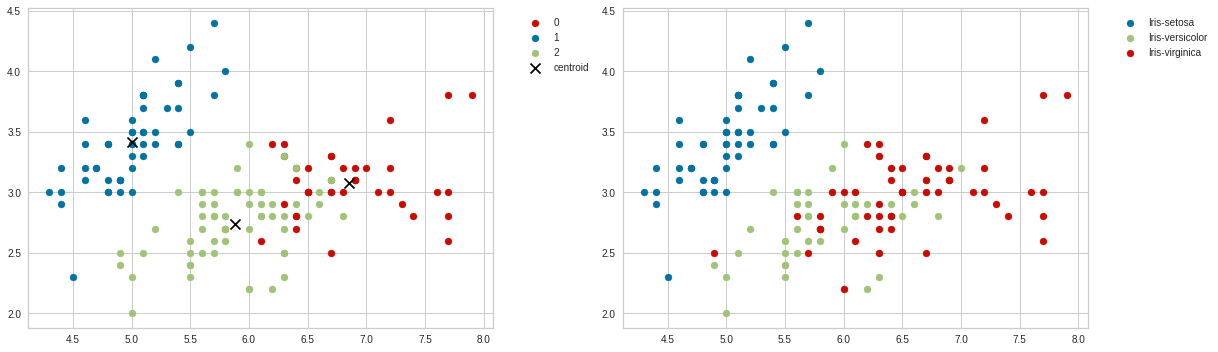

In [181]:
colors = itertools.cycle(["r", "b", "g"])
fig, axs = plt.subplots(ncols=2, figsize=(17,5))

for n, grp in iris_result.groupby("cluster"):
    axs[0].scatter(grp.sepal_length, grp.sepal_width, label=n, color=next(colors))
axs[0].scatter(centroids['sepal_length'], centroids['sepal_width'], c='black', s=100, marker='x', label='centroid')
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

for n, grp in iris_dataset.groupby("class"):
    axs[1].scatter(grp.sepal_length, grp.sepal_width, label=n)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

plt.tight_layout()
plt.show()

####Comparision using `petal_length` and `petal_width`

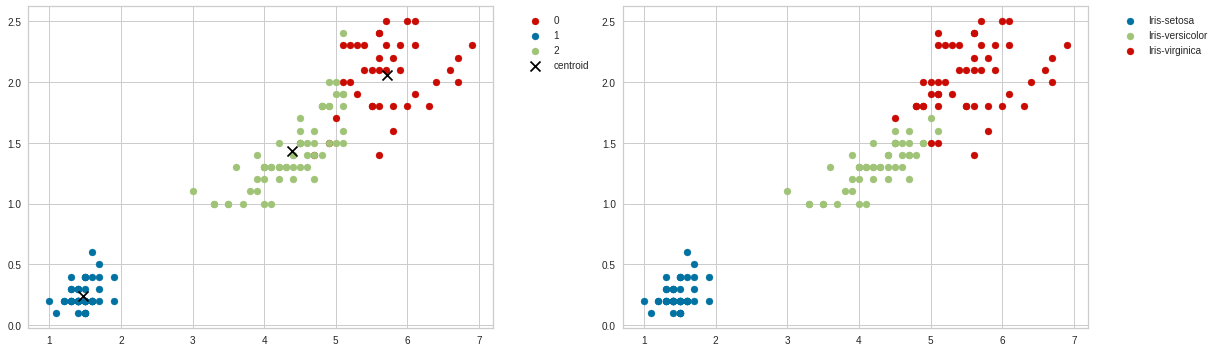

In [182]:
colors = itertools.cycle(["r", "b", "g"])
fig, axs = plt.subplots(ncols=2, figsize=(17,5))

for n, grp in iris_result.groupby("cluster"):
    axs[0].scatter(grp.petal_length, grp.petal_width, label=n, color=next(colors))
axs[0].scatter(centroids['petal_length'], centroids['petal_width'], c='black', s=100, marker='x', label='centroid')
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

for n, grp in iris_dataset.groupby("class"):
    axs[1].scatter(grp.petal_length, grp.petal_width, label=n)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

plt.tight_layout()
plt.show()

####Comparision using `sepal_length` and `sepal_width`



###Comparision between predicted and actual clusters - DBScan

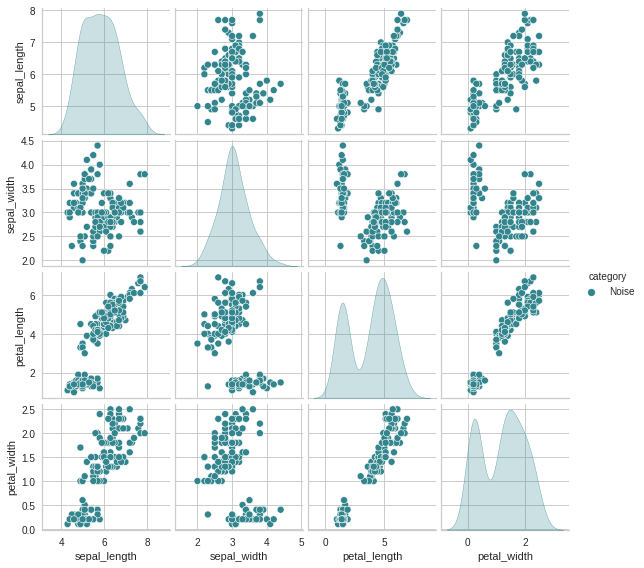

In [183]:
sns.pairplot(output1, hue="category", height = 2, palette = 'crest');

If we use small value of eps, we need to use small value of min points else it will never satisfy the condition and every datapoint will be considered as noise 

In [184]:
eps2 = 0.3
min_points2 = 5
dbscan2 = DBSCAN(eps2, min_points2)
output2 = dbscan2.evaluate(dataset)
print(output2)

      category  sepal_length  sepal_width  petal_length  petal_width
0    Cluster 1           5.1          3.5           1.4          0.2
1    Cluster 1           4.9          3.0           1.4          0.2
2    Cluster 1           4.7          3.2           1.3          0.2
3    Cluster 1           4.6          3.1           1.5          0.2
4    Cluster 1           5.0          3.6           1.4          0.2
..         ...           ...          ...           ...          ...
145      Noise           6.7          3.0           5.2          2.3
146      Noise           6.3          2.5           5.0          1.9
147      Noise           6.5          3.0           5.2          2.0
148      Noise           6.2          3.4           5.4          2.3
149  Cluster 3           5.9          3.0           5.1          1.8

[150 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


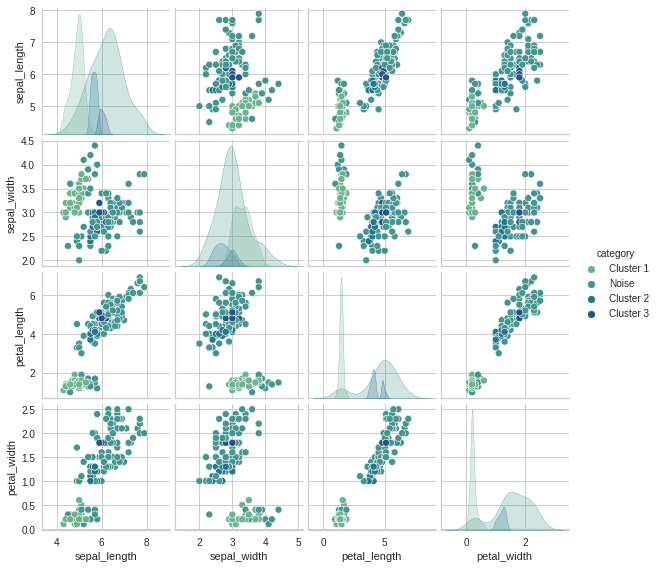

In [185]:
sns.pairplot(output2, hue="category", height = 2, palette = 'crest');

In [186]:
output["category"].value_counts()

Noise        62
Cluster 1    46
Cluster 2    42
Name: category, dtype: int64

In [188]:
iris_dataset["class"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

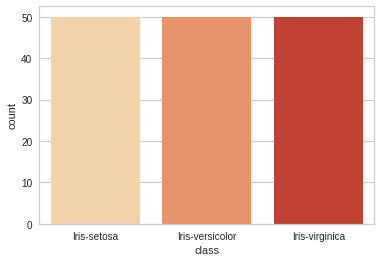

In [189]:
sns.countplot(x='class',data=iris_dataset, palette="OrRd")

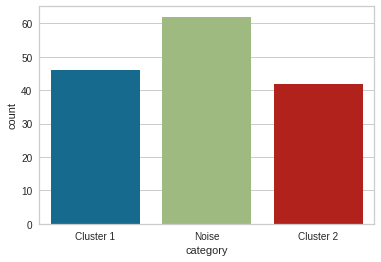

In [191]:
sns.countplot(x='category',data=output)

####Comparision using `sepal_length` and `sepal_width`


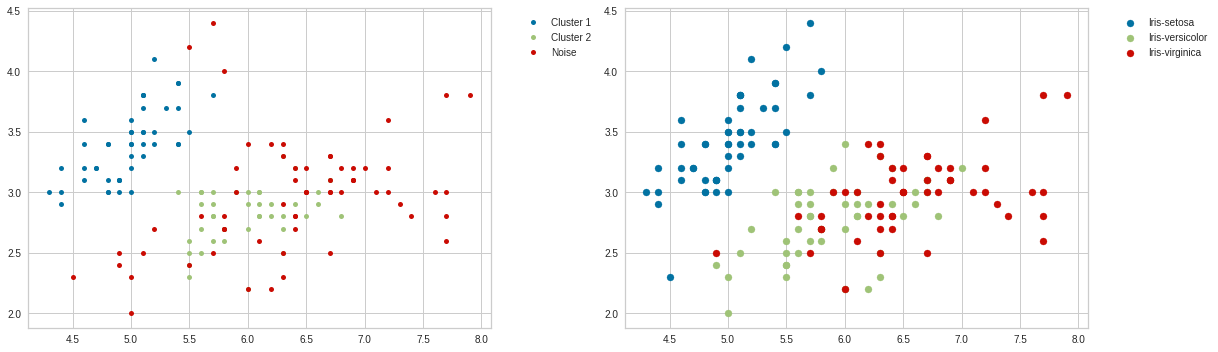

In [193]:
fig, axs = plt.subplots(ncols=2, figsize=(17,5))
groups = output.groupby('category')
for name, group in groups:
    axs[0].plot(group.sepal_length, group.sepal_width, marker='o', linestyle='', markersize=5, label=name)
axs[0].legend()
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

for n, grp in iris_dataset.groupby("class"):
    axs[1].scatter(grp.sepal_length, grp.sepal_width, label=n)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

plt.tight_layout()
plt.show()

####Comparision using `petal_length` and `petal_width`


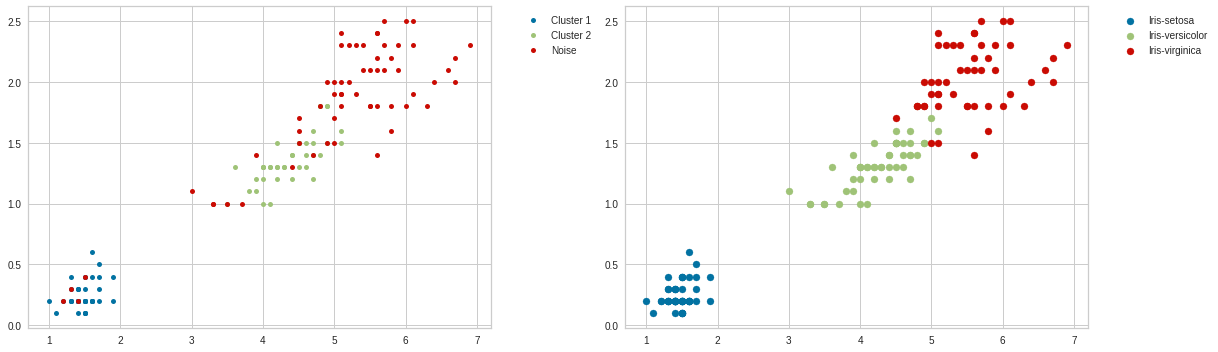

In [195]:
fig, axs = plt.subplots(ncols=2, figsize=(17,5))
groups = output.groupby('category')
for name, group in groups:
    axs[0].plot(group.petal_length, group.petal_width, marker='o', linestyle='', markersize=5, label=name)
axs[0].legend()
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

for n, grp in iris_dataset.groupby("class"):
    axs[1].scatter(grp.petal_length, grp.petal_width, label=n)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

plt.tight_layout()
plt.show()

##`Wholesale Customers` Dataset
---
URL = https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Some information about Wholesale Cutomer Deateset -
The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

### Importing dataset and initial observations


In [196]:
# Importing Wholesale Customers
wc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
urlretrieve(wc_url)

# Creating a pandas object
wc_dataset = pd.read_csv(wc_url, sep=',')

wc_dataset.head() # Printing top 5 rows

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Understanding the Dataset

In [197]:
# replacing Channel index with actual values before dropping them to get better insights of Data
wc_dataset['Channel'] = wc_dataset['Channel'].map({1:'Horeca', 2:'Retail'})
wc_dataset['Region'].replace([1,2,3],['Lisbon','Oporto','other'],inplace=True)
wc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [198]:
wc_dataset.groupby('Channel').size()

Channel
Horeca    298
Retail    142
dtype: int64

In [199]:
wc_dataset.groupby('Region').size()

Region
Lisbon     77
Oporto     47
other     316
dtype: int64

In [200]:
wc_dataset.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


from the above heatmap too we can recconfirm the corelation between paper and detergant products and and grocery this means that 

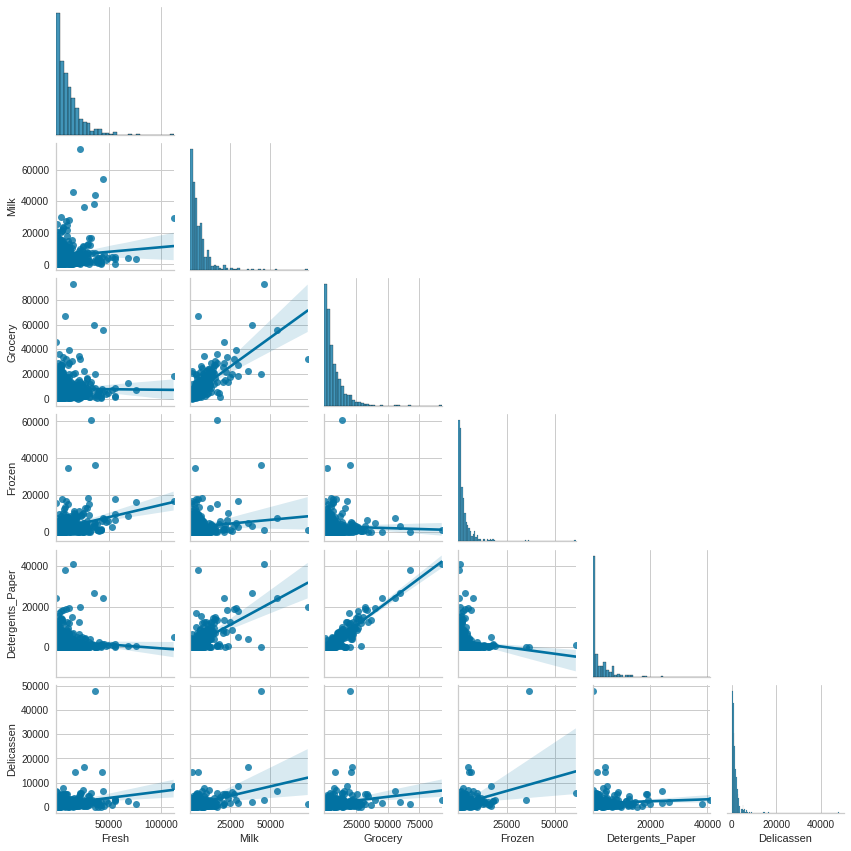

In [201]:
sns.pairplot(wc_dataset, height = 2, palette = 'colorblind', corner=True, kind='reg');

**Observation**:

From the graph above, we see that annual spending (m.u.) on detergents and paper products and Milk base products are co related positively

From the pairplot above, the correlation between the "detergents and paper products" and the "grocery products" is strong, this means that consumers  spend money on these two types of product often.

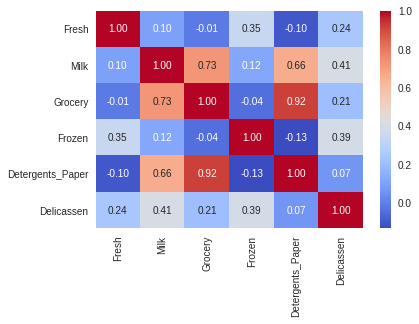

In [202]:
sns.heatmap(wc_dataset.drop(columns=['Channel', 'Region']).corr(), annot=True, fmt='.2f', cmap='coolwarm')

**Observation**:

The above corelation graph confirms the same by teling that Grocery products and detergents and paper products are indeed postively related. 

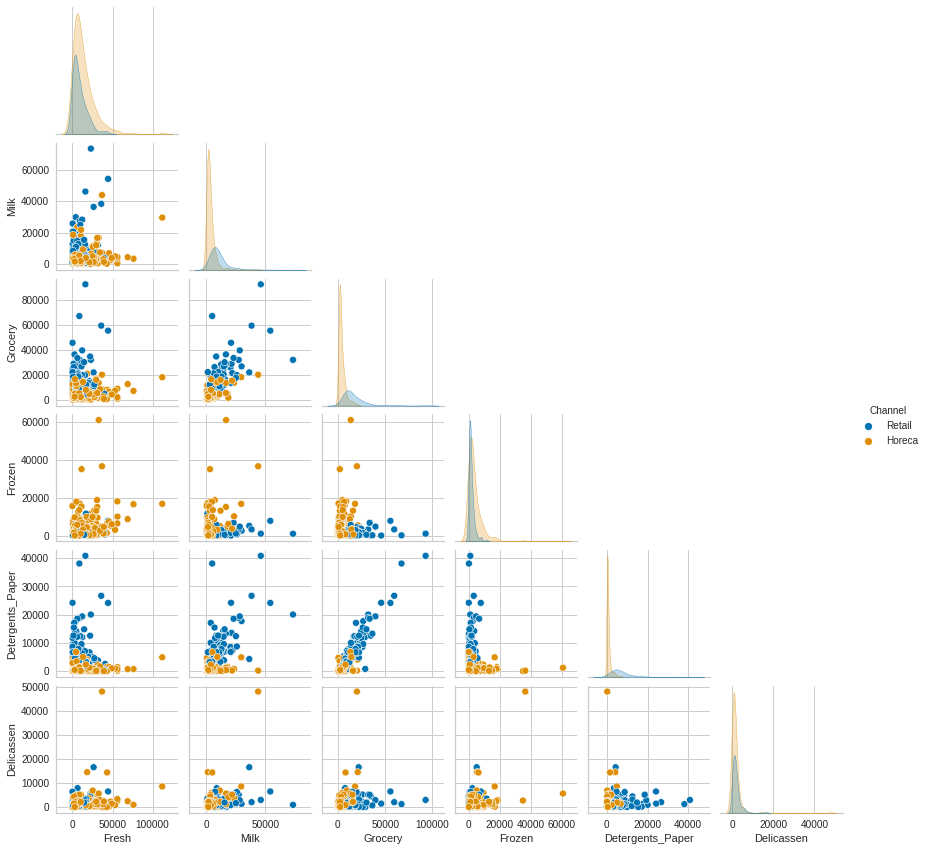

In [203]:
sns.pairplot(wc_dataset.drop(columns=['Region']), hue="Channel", corner=True, height = 2, palette = 'colorblind');

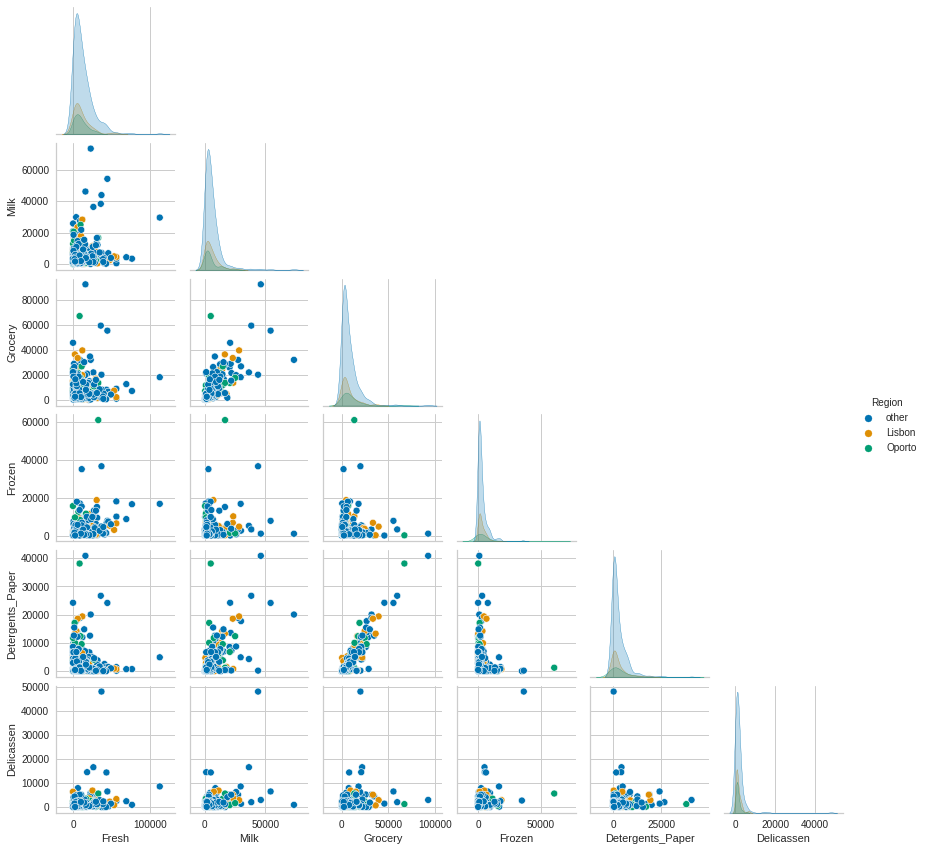

In [204]:
sns.pairplot(wc_dataset.drop(columns=['Channel']), hue="Region", corner=True, height = 2, palette = 'colorblind');

### Preprocessing dataset

In [206]:
# Redownloading, Scaling and Standardising the dataset after removing Channel and Region  
wc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
urlretrieve(wc_url)

# Creating a pandas object
wc_dataset = pd.read_csv(wc_url, sep=',')
wc_dataset_custom = pd.read_csv(wc_url, sep=',')
wc_dataset= wc_dataset.drop(columns=['Channel', 'Region'])
print("\tActual data\n")
print(wc_dataset.head())
scaler = StandardScaler()
scaled_df = scaler.fit_transform(wc_dataset)
pd.DataFrame(scaled_df).describe()

wc_dataset = pd.DataFrame(scaled_df)
print("\n\n\tScalled data\n")
wc_dataset.head()

	Actual data

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


	Scalled data



,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


###Applying KMeans



#### Determining the value of K using elbow method


Initial centroids:
          0         1         2         3         4         5
0  0.254707 -0.751258 -0.717764 -0.114645 -0.535124 -0.468909

Iteration:  1

Old centroids:
          0         1         2         3         4         5
0  0.254707 -0.751258 -0.717764 -0.114645 -0.535124 -0.468909
New centroids:
              0             1  ...             4             5
0 -2.422305e-17 -1.589638e-17  ... -1.917658e-17 -8.276208e-17

[1 rows x 6 columns]

Iteration:  2

Old centroids:
              0             1  ...             4             5
0 -2.422305e-17 -1.589638e-17  ... -1.917658e-17 -8.276208e-17

[1 rows x 6 columns]
New centroids:
              0             1  ...             4             5
0 -2.422305e-17 -1.589638e-17  ... -1.917658e-17 -8.276208e-17

[1 rows x 6 columns]

Initial centroids:
          0         1         2         3         4         5
0  0.440491 -0.286255 -0.347045 -0.415110 -0.226458 -0.304189
1 -0.372779 -0.648979 -0.620423 -0.367267 -0.554652 

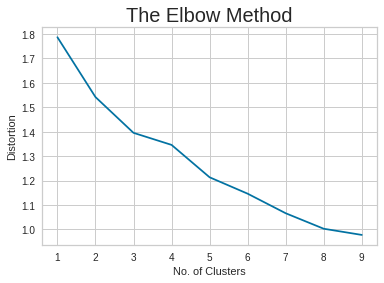

<Figure size 720x360 with 0 Axes>

In [208]:
#Elbow Method
Range = range(1, 10)
distortions = []
for i in Range:
  k = KMeans(k=i)
  k.evaluate(df=wc_dataset)
  # the sum of square distances from each point to its assigned center
  distortions.append(sum(np.min(cdist(wc_dataset, k.centroids, 'euclidean'), axis=1)) / wc_dataset.shape[0])
 
plt.plot(Range, distortions, 'bx-')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Distortion')
plt.figure(figsize = (10,5))
plt.show()

The most optimal value of `k is 5` because the distortion diffrence between k=5 nad k=6 is the least.

In [209]:
kmeans = KMeans(k=5)
kmeans.evaluate(df=wc_dataset)


Initial centroids:
          0         1         2         3         4         5
0 -0.175438 -0.660781 -0.584289  0.283569 -0.566621 -0.435894
1  0.060057  0.208049 -0.360108 -0.272198 -0.600847  0.392676
2 -0.453679 -0.637720 -0.629062  0.162517 -0.477171  0.226181
3 -0.550885 -0.635007 -0.536777  0.912338 -0.551292 -0.408204
4  0.626354  0.130594  0.580543 -0.374484  0.474444 -0.245259

Iteration:  1

Old centroids:
          0         1         2         3         4         5
0 -0.175438 -0.660781 -0.584289  0.283569 -0.566621 -0.435894
1  0.060057  0.208049 -0.360108 -0.272198 -0.600847  0.392676
2 -0.453679 -0.637720 -0.629062  0.162517 -0.477171  0.226181
3 -0.550885 -0.635007 -0.536777  0.912338 -0.551292 -0.408204
4  0.626354  0.130594  0.580543 -0.374484  0.474444 -0.245259
New centroids:
          0         1         2         3         4         5
0 -0.035214 -0.549347 -0.561173 -0.131632 -0.482872 -0.346137
1  0.239589  0.218768 -0.114596 -0.115782 -0.259687  0.614209
2 -0

In [210]:
wc_result = wc_dataset.copy(deep=True)
wc_result['cluster'] = kmeans.cluster_set
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
iris_result_with_centroids = pd.concat([wc_result, centroids]) # Useful if using seaborn

In [211]:
print("\nClustering using custom KMeans")
print(wc_result["cluster"].value_counts())


Clustering using custom KMeans
0    261
2     96
3     68
4     10
1      5
Name: cluster, dtype: int64


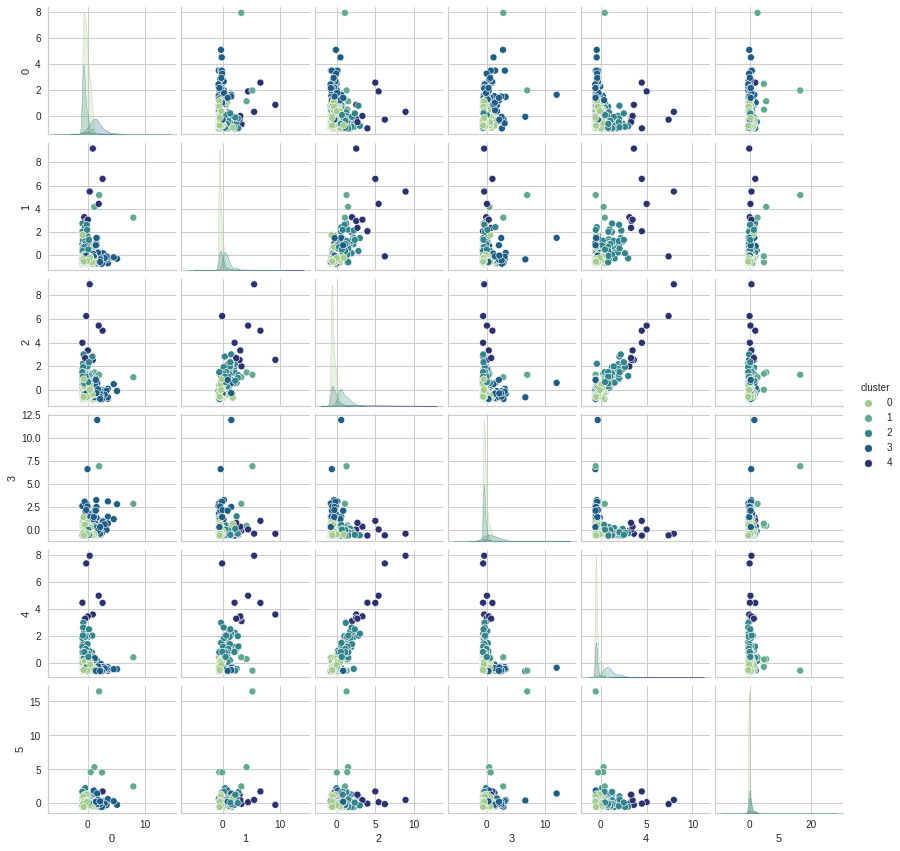

In [212]:
# Visualising kmeans
legend_order = list(range(5))
legend_order.append('centroid')
# print(wc_dataset.head())
sns.pairplot(wc_result, hue="cluster", height = 2, palette = 'crest', hue_order = legend_order);

## DBScan Implementation

In [213]:
## Using grocery (1) and milk (2) and selecting with indexing for better results
dataset = wc_dataset.iloc[:,[1,2]]
# dataset = wc_dataset
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       440 non-null    float64
 1   2       440 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


,1,2
count,4.400000e+02,4.400000e+02
mean,-1.589638e-17,-6.030530e-17
std,1.001138e+00,1.001138e+00
min,-7.787951e-01,-8.373344e-01
25%,-5.783063e-01,-6.108364e-01
50%,-2.942580e-01,-3.366684e-01
75%,1.890921e-01,2.849105e-01
max,9.183650e+00,8.936528e+00


As we know that DBScan is used to segregate dense clusters from sparse clusters, we use diffrent eps and minpts to get better reults.

Setting min_points = 7, 21, 15 when eps=0.9

      category         1         2
0    Cluster 1  0.523568 -0.041115
1    Cluster 1  0.544458  0.170318
2    Cluster 1  0.408538 -0.028157
3    Cluster 1 -0.624020 -0.392977
4    Cluster 1 -0.052396 -0.079356
..         ...       ...       ...
435  Cluster 1  0.848446  0.850760
436  Cluster 1 -0.592142 -0.757165
437  Cluster 1  1.314671  2.348386
438  Cluster 1 -0.517536 -0.602514
439  Cluster 1 -0.555924 -0.573227

[440 rows x 3 columns]
Cluster 1    430
Noise         10
Name: category, dtype: int64


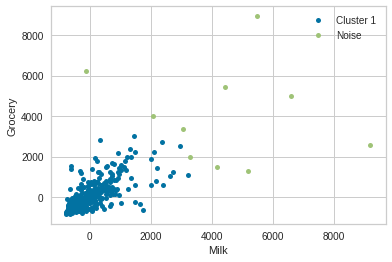

In [214]:

eps = 0.9
min_points = 7
dbscan = DBSCAN(eps, min_points)
output = dbscan.evaluate(dataset)
print(output)
groups = output.groupby('category')
for name, group in groups:
    plt.plot(group[1]*1000, group[2]*1000, marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("Milk")
plt.ylabel("Grocery")
print(output["category"].value_counts())

      category         1         2
0    Cluster 1  0.523568 -0.041115
1    Cluster 1  0.544458  0.170318
2    Cluster 1  0.408538 -0.028157
3    Cluster 1 -0.624020 -0.392977
4    Cluster 1 -0.052396 -0.079356
..         ...       ...       ...
435  Cluster 1  0.848446  0.850760
436  Cluster 1 -0.592142 -0.757165
437  Cluster 1  1.314671  2.348386
438  Cluster 1 -0.517536 -0.602514
439  Cluster 1 -0.555924 -0.573227

[440 rows x 3 columns]
Cluster 1    420
Noise         20
Name: category, dtype: int64


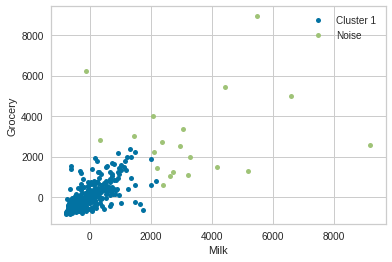

In [215]:
eps = 0.9
min_points = 21
dbscan = DBSCAN(eps, min_points)
output = dbscan.evaluate(dataset)
print(output)
groups = output.groupby('category')
for name, group in groups:
    plt.plot(group[1]*1000, group[2]*1000, marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("Milk")
plt.ylabel("Grocery")
print(output["category"].value_counts())

      category         1         2
0    Cluster 1  0.523568 -0.041115
1    Cluster 1  0.544458  0.170318
2    Cluster 1  0.408538 -0.028157
3    Cluster 1 -0.624020 -0.392977
4    Cluster 1 -0.052396 -0.079356
..         ...       ...       ...
435  Cluster 1  0.848446  0.850760
436  Cluster 1 -0.592142 -0.757165
437  Cluster 1  1.314671  2.348386
438  Cluster 1 -0.517536 -0.602514
439  Cluster 1 -0.555924 -0.573227

[440 rows x 3 columns]
Cluster 1    422
Noise         18
Name: category, dtype: int64


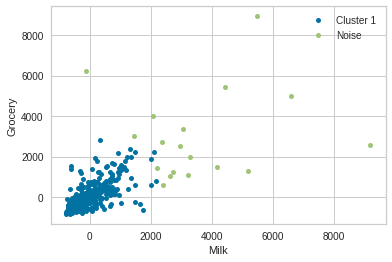

In [216]:
eps = 0.9
min_points = 15
dbscan = DBSCAN(eps, min_points)
output = dbscan.evaluate(dataset)
print(output)
groups = output.groupby('category')
for name, group in groups:
    plt.plot(group[1]*1000, group[2]*1000, marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("Milk")
plt.ylabel("Grocery")
print(output["category"].value_counts())

As we can observe from above, as min_points decrease, sparser density points are added to the cluster to and vice versa for the increment, setting min_points = 15 provides a good segregation between dense and sparse points, where sparse pointrs are considered noise.

Now, testing diffrent eps as 3, 0.9, 0.1

      category         1         2
0    Cluster 1  0.523568 -0.041115
1    Cluster 1  0.544458  0.170318
2    Cluster 1  0.408538 -0.028157
3    Cluster 1 -0.624020 -0.392977
4    Cluster 1 -0.052396 -0.079356
..         ...       ...       ...
435  Cluster 1  0.848446  0.850760
436  Cluster 1 -0.592142 -0.757165
437  Cluster 1  1.314671  2.348386
438  Cluster 1 -0.517536 -0.602514
439  Cluster 1 -0.555924 -0.573227

[440 rows x 3 columns]
Cluster 1    436
Noise          4
Name: category, dtype: int64


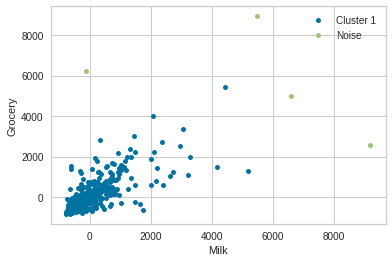

In [217]:
eps = 3
min_points = 15
dbscan = DBSCAN(eps, min_points)
output = dbscan.evaluate(dataset)
print(output)
groups = output.groupby('category')
for name, group in groups:
    plt.plot(group[1]*1000, group[2]*1000, marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("Milk")
plt.ylabel("Grocery")
print(output["category"].value_counts())

      category         1         2
0        Noise  0.523568 -0.041115
1        Noise  0.544458  0.170318
2        Noise  0.408538 -0.028157
3    Cluster 1 -0.624020 -0.392977
4        Noise -0.052396 -0.079356
..         ...       ...       ...
435      Noise  0.848446  0.850760
436  Cluster 1 -0.592142 -0.757165
437      Noise  1.314671  2.348386
438  Cluster 1 -0.517536 -0.602514
439  Cluster 1 -0.555924 -0.573227

[440 rows x 3 columns]
Noise        231
Cluster 1    194
Cluster 2     15
Name: category, dtype: int64


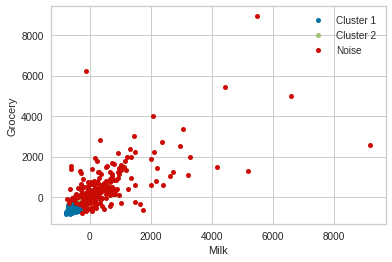

In [218]:
eps = 0.1
min_points = 15
dbscan = DBSCAN(eps, min_points)
output = dbscan.evaluate(dataset)
print(output)
groups = output.groupby('category')
for name, group in groups:
    plt.plot(group[1]*1000, group[2]*1000, marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("Milk")
plt.ylabel("Grocery")
print(output["category"].value_counts())

      category         1         2
0    Cluster 1  0.523568 -0.041115
1    Cluster 1  0.544458  0.170318
2    Cluster 1  0.408538 -0.028157
3    Cluster 1 -0.624020 -0.392977
4    Cluster 1 -0.052396 -0.079356
..         ...       ...       ...
435  Cluster 1  0.848446  0.850760
436  Cluster 1 -0.592142 -0.757165
437  Cluster 1  1.314671  2.348386
438  Cluster 1 -0.517536 -0.602514
439  Cluster 1 -0.555924 -0.573227

[440 rows x 3 columns]
Cluster 1    422
Noise         18
Name: category, dtype: int64


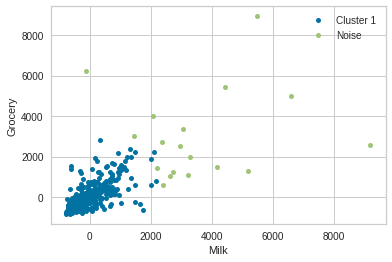

In [219]:
eps = 0.9
min_points = 15
dbscan = DBSCAN(eps, min_points)
output = dbscan.evaluate(dataset)
print(output)
groups = output.groupby('category')
for name, group in groups:
    plt.plot(group[1]*1000, group[2]*1000, marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("Milk")
plt.ylabel("Grocery")
print(output["category"].value_counts())

As we can observe, using a very small eps can create multiple clusters which are not required and using too high eps can effect the noise segregation, so 0.9 seems like a better choice than 0.3 and 3